<a href="https://colab.research.google.com/github/Asiya-Arif/DS_Asiya-Arif/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import os
sns.set(style="whitegrid")

# Load Datasets

In [ ]:
btc_sentiment_path = '/content/fear_greed_index.csv'
trader_data_path = '/content/historical_data.csv'

In [ ]:
btc_sentiment = pd.read_csv(btc_sentiment_path)
trader_data = pd.read_csv(trader_data_path)

# Convert Date Columns

In [ ]:
btc_sentiment['date'] = pd.to_datetime(btc_sentiment['date'], errors='coerce')
trader_data['Timestamp IST'] = pd.to_datetime(trader_data['Timestamp IST'], errors='coerce', format='%d-%m-%Y %H:%M')

# Missing Value Checks

In [ ]:
print("Missing values in Bitcoin Sentiment Dataset:")
print(btc_sentiment.isnull().sum())
print("\nMissing values in Trader Data:")
print(trader_data.isnull().sum())

Missing values in Bitcoin Sentiment Dataset:
timestamp         0
value             0
classification    0
date              0
dtype: int64

Missing values in Trader Data:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


# Basic Data Info & Stats

In [ ]:
# Preview data samples
print("Bitcoin Sentiment Dataset Sample:")
print(btc_sentiment.head())
print("\nTrader Data Sample:")
print(trader_data.head())

Bitcoin Sentiment Dataset Sample:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05

Trader Data Sample:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       

In [ ]:
print("Unique Traders:", trader_data['Account'].nunique())
print("Unique Symbols Traded:", trader_data['Coin'].nunique())
print("Date range in Sentiment Data:", btc_sentiment['date'].min(), "to", btc_sentiment['date'].max())
print("Date range in Trader Data:", trader_data['Timestamp IST'].min(), "to", trader_data['Timestamp IST'].max())

Unique Traders: 32
Unique Symbols Traded: 246
Date range in Sentiment Data: 2018-02-01 to 2025-05-02
Date range in Trader Data: 01-01-2024 01:23 to 31-12-2024 23:33


In [ ]:
print("Closed PnL Statistics:")
print(trader_data['Closed PnL'].describe())


Closed PnL Statistics:
count    211224.000000
mean         48.749001
std         919.164828
min     -117990.104100
25%           0.000000
50%           0.000000
75%           5.792797
max      135329.090100
Name: Closed PnL, dtype: float64


# Data Aggregation and Merging

In [ ]:
# Convert 'Date' and 'time' columns to datetime
btc_sentiment['date'] = pd.to_datetime(btc_sentiment['date'], errors='coerce')
trader_data['Timestamp IST'] = pd.to_datetime(trader_data['Timestamp IST'], errors='coerce', format='%d-%m-%Y %H:%M')

In [ ]:
# Extract date from trader_data datetime
trader_data['Date'] = trader_data['Timestamp IST'].dt.date

In [ ]:
# Aggregate trader data by date
daily_trader_metrics = trader_data.groupby('Date').agg(
    total_trades=('Account', 'count'),
    unique_traders=('Account', 'nunique'),
    avg_closedPnL=('Closed PnL', 'mean'),
    total_volume=('Size USD', 'sum')
).reset_index()

# Convert the 'Date' column to datetime objects after aggregation
daily_trader_metrics['Date'] = pd.to_datetime(daily_trader_metrics['Date'])

In [ ]:
# Merge aggregated trader data with sentiment data
merged_data = pd.merge(daily_trader_metrics, btc_sentiment, left_on='Date', right_on='date', how='inner')

In [ ]:
# Check for missing values in the merged dataframe
print("\nMissing values in Merged Data:")
print(merged_data.isnull().sum())


Missing values in Merged Data:
Date              0
total_trades      0
unique_traders    0
avg_closedPnL     0
total_volume      0
timestamp         0
value             0
classification    0
date              0
dtype: int64


In [ ]:
# Display the first few rows of the merged dataframe
print("Merged Data Sample:")
display(merged_data.head())

Merged Data Sample:


,Date,total_trades,unique_traders,avg_closedPnL,total_volume,timestamp,value,classification,date
0,2024-03-13,7,1,0.000000,6000.80,1710307800,81,Extreme Greed,2024-03-13
1,2024-03-14,1,1,65.480454,6066.28,1710394200,88,Extreme Greed,2024-03-14
2,2024-03-15,8,1,42.303540,26339.81,1710480600,83,Extreme Greed,2024-03-15
3,2024-03-16,6,1,38.096640,27223.66,1710567000,81,Extreme Greed,2024-03-16
4,2024-03-17,14,1,30.691648,87063.35,1710653400,79,Extreme Greed,2024-03-17


# Analysis and Visualization

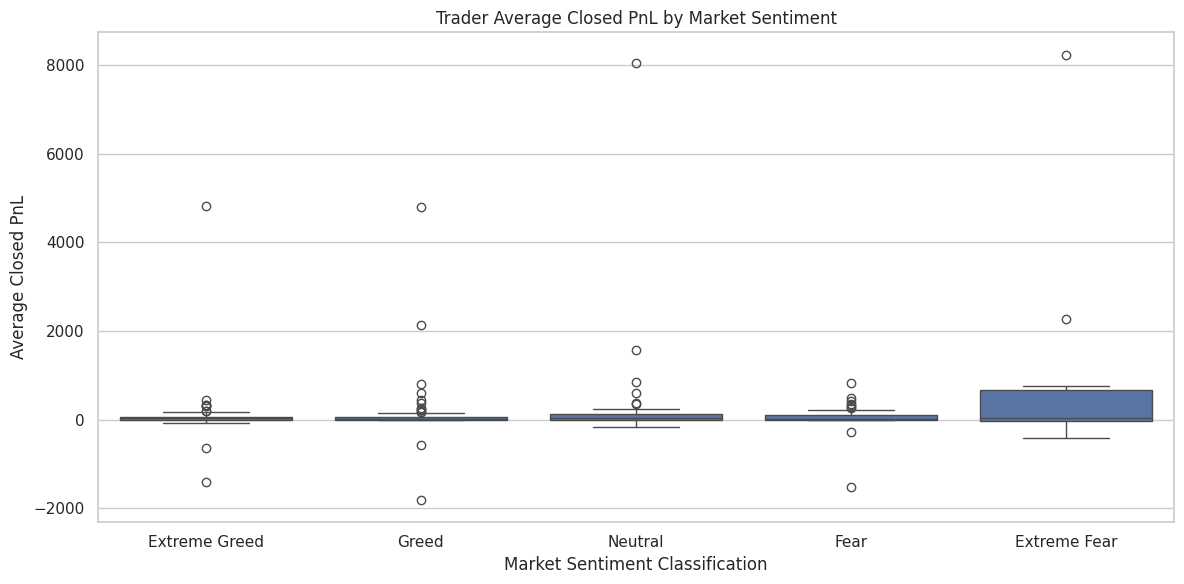

In [ ]:
# Visualization of avg_closedPnL for Fear vs Greed days
plt.figure(figsize=(12,6))
sns.boxplot(data=merged_data, x='classification', y='avg_closedPnL')
plt.title('Trader Average Closed PnL by Market Sentiment')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Average Closed PnL')
plt.tight_layout()
plt.show()

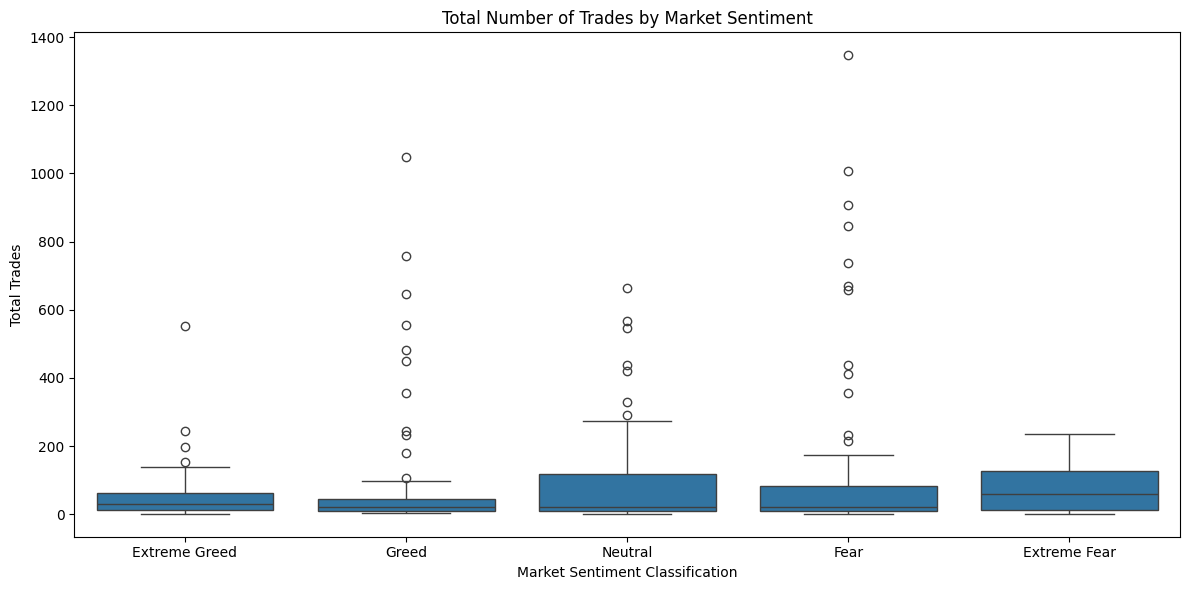

In [ ]:
# Visualization of Total Trades by Sentiment Classification
plt.figure(figsize=(12,6))
sns.boxplot(data=merged_data, x='classification', y='total_trades')
plt.title('Total Number of Trades by Market Sentiment')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Total Trades')
plt.tight_layout()
plt.show()

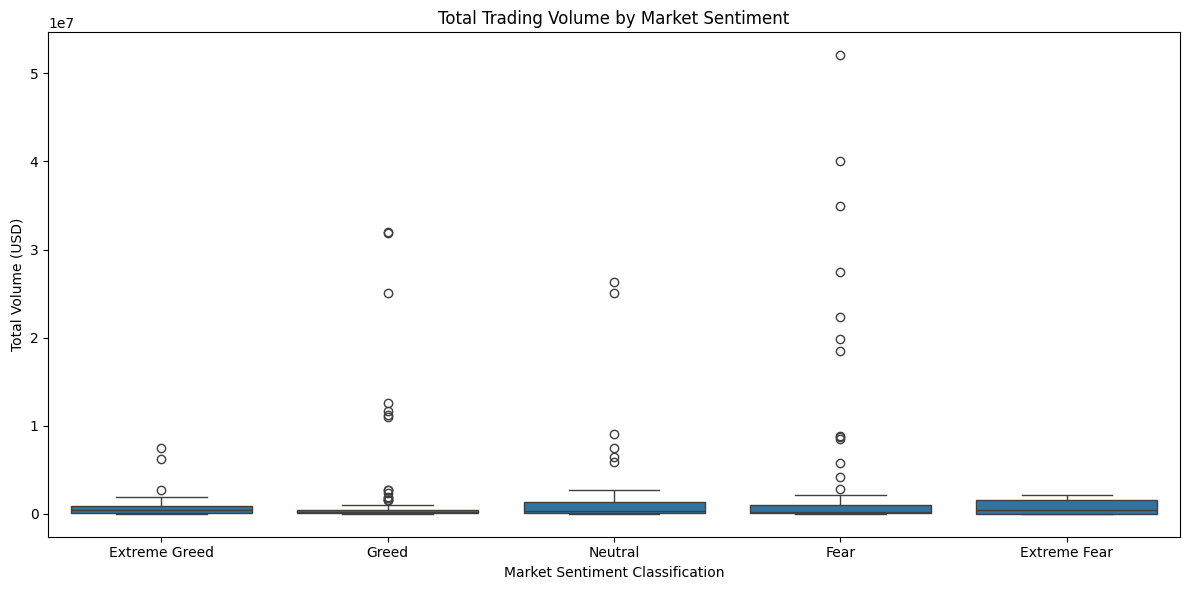

In [ ]:
# Visualization of Total Volume by Sentiment Classification
plt.figure(figsize=(12,6))
sns.boxplot(data=merged_data, x='classification', y='total_volume')
plt.title('Total Trading Volume by Market Sentiment')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Total Volume (USD)')
plt.tight_layout()
plt.show()

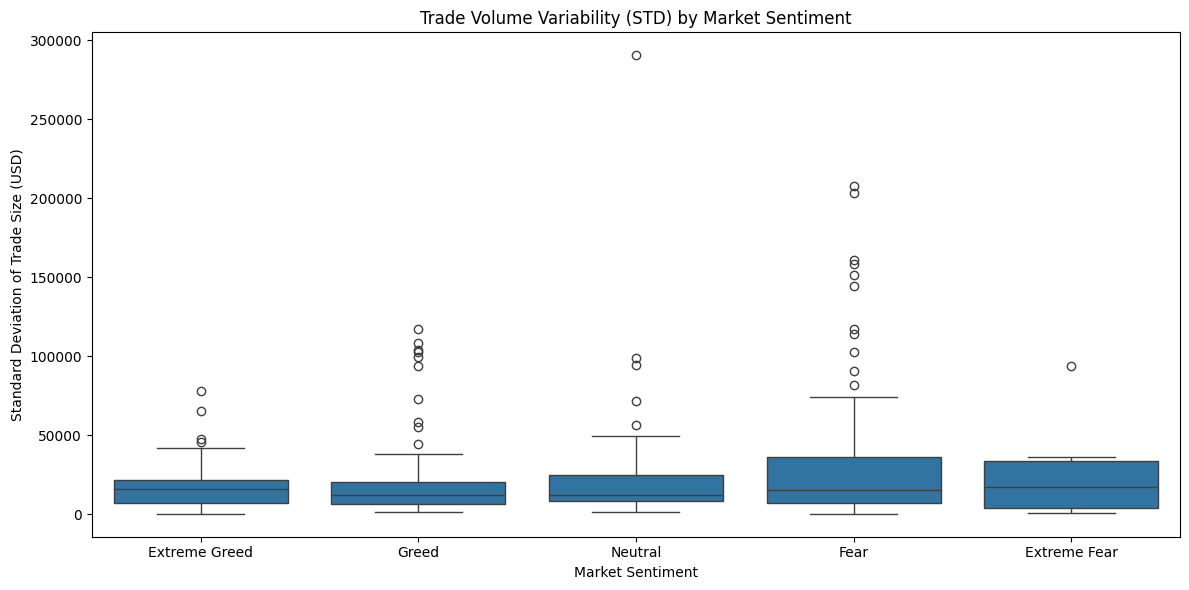

In [ ]:
# Visualize risk metrics by market sentiment
plt.figure(figsize=(12,6))
sns.boxplot(data=risk_merged, x='classification', y='std_trade_volume')
plt.title('Trade Volume Variability (STD) by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Standard Deviation of Trade Size (USD)')
plt.tight_layout()
plt.show()

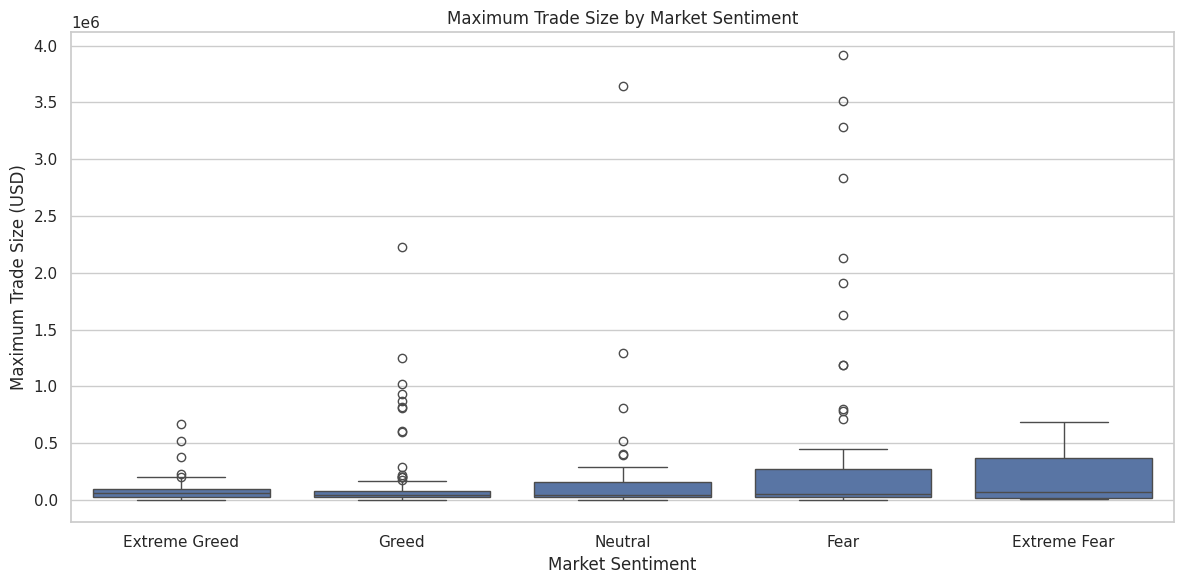

In [ ]:
# Visualize Maximum Trade Size by Market Sentiment
plt.figure(figsize=(12,6))
sns.boxplot(data=risk_merged, x='classification', y='max_trade_volume')
plt.title('Maximum Trade Size by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Maximum Trade Size (USD)')
plt.tight_layout()
plt.show()

# Statistical test

In [ ]:
# Split data into Fear and Greed groups (including Extreme Fear and Extreme Greed)
fear_mask = merged_data['classification'].str.contains('Fear')
greed_mask = merged_data['classification'].str.contains('Greed')

fear_pnl = merged_data.loc[fear_mask, 'avg_closedPnL']
greed_pnl = merged_data.loc[greed_mask, 'avg_closedPnL']

fear_vol = merged_data.loc[fear_mask, 'total_volume']
greed_vol = merged_data.loc[greed_mask, 'total_volume']

fear_trades = merged_data.loc[fear_mask, 'total_trades']
greed_trades = merged_data.loc[greed_mask, 'total_trades']

In [ ]:
# Perform t-tests
def print_ttest_result(metric_name, fear_data, greed_data):
    t_stat, p_val = ttest_ind(fear_data, greed_data, nan_policy='omit')
    print(f"T-test for {metric_name} between Fear and Greed groups:")
    print(f" t-statistic = {t_stat:.3f}, p-value = {p_val:.5f}\n")

print_ttest_result("Average Closed PnL", fear_pnl, greed_pnl)
print_ttest_result("Total Volume", fear_vol, greed_vol)
print_ttest_result("Total Trades", fear_trades, greed_trades)

T-test for Average Closed PnL between Fear and Greed groups:
 t-statistic = 1.168, p-value = 0.24390

T-test for Total Volume between Fear and Greed groups:
 t-statistic = 3.200, p-value = 0.00154

T-test for Total Trades between Fear and Greed groups:
 t-statistic = 3.428, p-value = 0.00070



# Correlation Calculation

In [ ]:
# Convert sentiment 'value' to numeric
merged_data['value'] = pd.to_numeric(merged_data['value'], errors='coerce')

In [ ]:
# Calculate correlations
corr_volume = merged_data['value'].corr(merged_data['total_volume'])
corr_avg_pnl = merged_data['value'].corr(merged_data['avg_closedPnL'])
corr_total_trades = merged_data['value'].corr(merged_data['total_trades'])

print(f"Correlation between Sentiment Value and Total Trading Volume: {corr_volume:.3f}")
print(f"Correlation between Sentiment Value and Average Closed PnL: {corr_avg_pnl:.3f}")
print(f"Correlation between Sentiment Value and Total Number of Trades: {corr_total_trades:.3f}")

Correlation between Sentiment Value and Total Trading Volume: -0.157
Correlation between Sentiment Value and Average Closed PnL: -0.116
Correlation between Sentiment Value and Total Number of Trades: -0.182


# Regime-based comparisons (Fear vs. Greed)

In [139]:
def regime_based_comparison(merged_data):
    # Separate Fear and Greed regimes
    fear_data = merged_data[merged_data['classification'].str.contains('Fear', case=False)]
    greed_data = merged_data[merged_data['classification'].str.contains('Greed', case=False)]

    # Metrics to compare
    metrics = ['total_trades', 'unique_traders', 'avg_closedPnL', 'total_volume']

    # Calculate means
    fear_means = fear_data[metrics].mean()
    greed_means = greed_data[metrics].mean()

    # Perform t-tests
    from scipy.stats import ttest_ind
    ttest_results = {}
    for metric in metrics:
        t_stat, p_val = ttest_ind(greed_data[metric], fear_data[metric], equal_var=False, nan_policy='omit')
        ttest_results[metric] = {'t_stat': t_stat, 'p_val': p_val}

    return {'fear_means': fear_means, 'greed_means': greed_means, 'ttest_results': ttest_results}

# Example usage with your merged data
results = regime_based_comparison(merged_data)
print(results)


{'fear_means': total_trades      1.393108e+02
unique_traders    1.594595e+00
avg_closedPnL     2.001553e+02
total_volume      3.749351e+06
dtype: float64, 'greed_means': total_trades      5.820588e+01
unique_traders    1.460784e+00
avg_closedPnL     9.013264e+01
total_volume      1.145230e+06
dtype: float64, 'ttest_results': {'total_trades': {'t_stat': np.float64(-2.5092971068249272), 'p_val': np.float64(0.013999939709345946)}, 'unique_traders': {'t_stat': np.float64(-1.1688422613041103), 'p_val': np.float64(0.24489692667994487)}, 'avg_closedPnL': {'t_stat': np.float64(-0.8890066911266575), 'p_val': np.float64(0.37642137553034805)}, 'total_volume': {'t_stat': np.float64(-2.255198285234775), 'p_val': np.float64(0.0267875323922562)}}}


# Merged CSV Files

In [ ]:
os.makedirs('csv_files', exist_ok=True)

# Save daily aggregated trader metrics
daily_trader_metrics.to_csv('csv_files/daily_trader_metrics.csv', index=False)

# Save merged dataset (aggregated trader data + sentiment)
merged_data.to_csv('csv_files/merged_trader_sentiment.csv', index=False)